# Boxplots: Distribution Summaries for Exploratory and Comparative Analysis

A practical guide to understanding, implementing, and applying boxplots in real-world data analysis.

## Why are they useful ?
Most practical questions about a variable reduce to a few core concerns: where it is **centered**, how **spread out** it is, and how unusual the **extreme values** are.

A boxplot compresses this information into a compact visual summary, making it easy to compare distributions across groups.

At its core, a boxplot is built on **order**, not arithmetic. The data is sorted and interpreted through **ranks (percentiles)** rather than sums or squared deviations. This design choice makes boxplots robust to skewed distributions and extreme values, which are common in real-world data.

## Components
### Box
The box represents the interquartile range (IQR), which spans from the first quartile (Q1) to the third quartile (Q3).
- Left edge: first quartile **Q1**
- Middle line: second quartile **Q2** (median)
- Right edge: third quartile **Q3**

The IQR (Q3 − Q1) contains the middle 50% of the data, providing a robust measure of spread that is not influenced by extreme values.
### Wiskers
The whiskers extend from the box to the most extreme observations that are still considered part of the typical data range.

By convention, whiskers usually extend to the smallest and largest values within 1.5 × IQR below Q1 and above Q3. This rule is a heuristic, not a law, but it works well across many practical contexts.
### Outliers
Observations that fall beyond the whisker limits are flagged as outliers.

An outlier is not automatically an error. It is an observation that is unusually far from the bulk of the data and therefore deserves attention. Outliers may indicate data quality issues, rare but legitimate events, or important edge cases with significant business or analytical impact.

## What a boxplot does not show
- Does not show distribution shape
- Does not reveal multimodality

**Should be complemented with histograms or KDEs**

## Interpreting boxplots
The boxplot shape will show if a statistical data set is normally distributed or skewed.

**Normal Dataset:**

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd

Text(0.5, 1.0, 'Normally distributed boxplot')

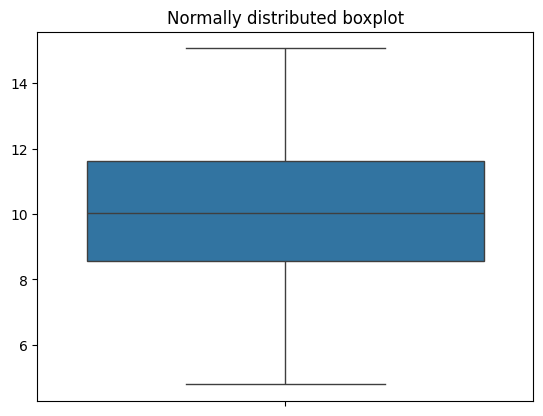

In [2]:
ndata = np.random.normal(10, 2, 100)
sns.boxplot(ndata).set_title('Normally distributed boxplot')

**Skewed datasets:**
- left skewed (negative)

Text(0.5, 1.0, 'Left Skewed')

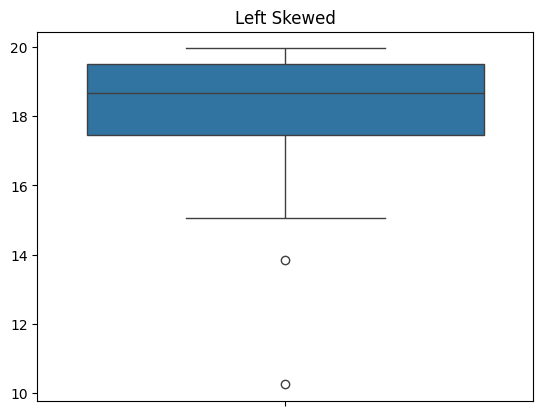

In [3]:
lskwd = 20 - np.random.exponential(scale=2, size=100)
sns.boxplot(lskwd).set_title('Left Skewed')

- right skewed (positive)

Text(0.5, 1.0, 'Right Skewed')

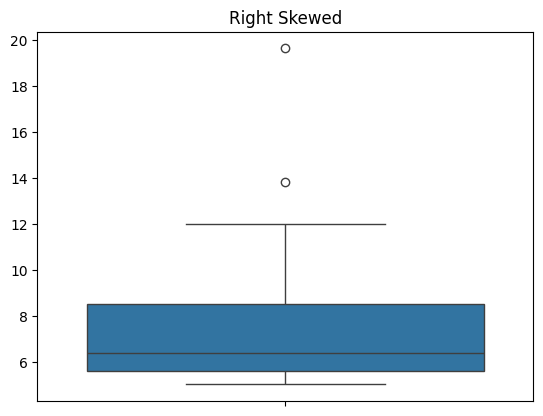

In [4]:
rskwd =  np.random.exponential(scale=2, size=100) + 5
sns.boxplot(rskwd).set_title('Right Skewed')

In [5]:
all_data = pd.DataFrame({
    'value': np.concatenate((ndata , lskwd , rskwd)),
    'type': ['normal'] * len(ndata) + ['left-skewed'] * len(lskwd) + ['right-skewed'] * len(rskwd)
})
all_data

,value,type
0,8.571815,normal
1,8.083723,normal
2,13.551259,normal
3,11.502501,normal
4,9.751096,normal
...,...,...
295,7.616967,right-skewed
296,5.432742,right-skewed
297,5.702053,right-skewed
298,12.017205,right-skewed


Text(0.5, 1.0, 'Boxplot Vs Distribution')

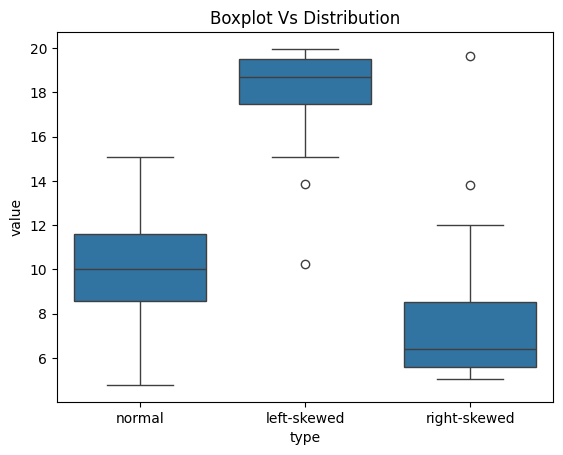

In [6]:
sns.boxplot(all_data, x='type', y='value').set_title('Boxplot Vs Distribution')